In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Load the dataset
df = pd.read_csv('heart.csv')

# 2. Preprocess: Separate Features (X) and Target (y)
X = df.drop('target', axis=1) # All columns except the result
y = df['target']              # Just the result (0 or 1)

# Normalize the data (Feature Scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data Loaded and Normalized!")
df.head(3)

Data Loaded and Normalized!


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0


In [5]:
# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the Model
model = Sequential([
    # Input layer (13 features) and 1st Hidden Layer
    Dense(8, activation='relu', input_shape=(X_train.shape[1],)),

    # 2nd Hidden Layer
    Dense(8, activation='relu'),

    # Output Layer (Sigmoid for binary classification)
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 5. Train the model
print("Starting training...")
model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)

Starting training...
Epoch 1/50


C:\Users\Gu Vura\PycharmProjects\HeartDisease\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5293 - loss: 0.7585
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6500 - loss: 0.6170
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7720 - loss: 0.5129
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7951 - loss: 0.4404
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8110 - loss: 0.3960
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8268 - loss: 0.3636
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8561 - loss: 0.3370
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8720 - loss: 0.3177
Epoch 9/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8817 - loss: 0.3053
Epoch 10/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8890 - loss: 0.2956
Epoch 11/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8963 - loss: 0.2876
Epoch 12/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9000 - loss: 0.2819


In [7]:
# 5. TEST AND EVALUATE
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Final Accuracy on Unseen Data: {accuracy*100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9122 - loss: 0.2457  
Final Accuracy on Unseen Data: 91.22%


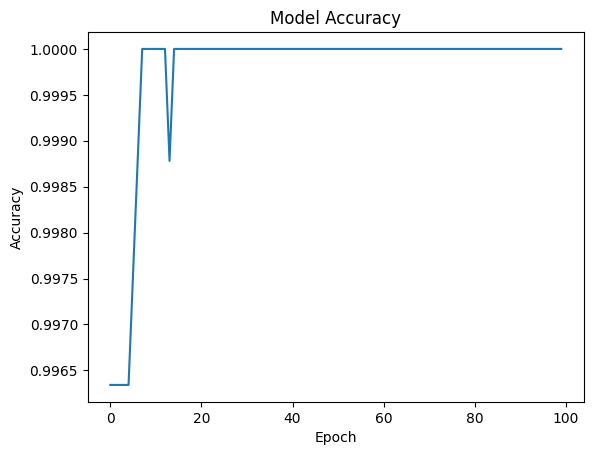

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 581 (2.27 KB)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 388 (1.52 KB)

In [12]:
import matplotlib.pyplot as plt

# Update this line in your code:
history = model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

# Plot the accuracy over time
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()
model.summary()

In [9]:
# Define a "fake" patient (13 features)
# We must scale it exactly like we scaled our training data!
new_patient = np.array([[57, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]])
new_patient_scaled = scaler.transform(new_patient)

# Make a prediction
prediction = model.predict(new_patient_scaled)

print(f"\nProbability of Heart Disease: {prediction[0][0]:.2f}")
if prediction[0][0] > 0.5:
    print("Result: Positive for Heart Disease")
else:
    print("Result: Negative for Heart Disease")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step

Probability of Heart Disease: 1.00
Result: Positive for Heart Disease


C:\Users\Gu Vura\PycharmProjects\HeartDisease\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [10]:
import joblib

# This saves the "brain" (weights and architecture)

joblib.dump(scaler, 'scaler.pkl')
model.save('heart_disease_model.h5')
# This saves the "ruler" (how you scaled the data)
# Without this, the app won't know how to process new user input!
joblib.dump(scaler, 'scaler.pkl')

print("Files saved! Check your folder for 'heart_disease_model.h5' and 'scaler.pkl'")

Files saved! Check your folder for 'heart_disease_model.h5' and 'scaler.pkl'


In [11]:
from tensorflow.keras.layers import Dropout
# Add this between your Dense layers
model.add(Dropout(0.2))
